# 11. Model total consumption, with no zero consumption

- Builds a model and predicts total consumptiom
- Exludes points that have zero consumption

## Prepare
### Read data

In [1]:
# import modules
import pandas as pd
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# read point level data, simple format
point_simple = pd.read_csv('../process_data/point_consumpt_simple.csv')

In [4]:
# preview table
point_simple.shape

(18783, 74)

## Filter points with zero pest consumption

In [5]:
# filter data tp remove areas that have no consumption in a copy of the dataset

point_simple_filter = point_simple[(point_simple['point_cons_temp_ha'] > 0) & \
                             (point_simple['point_cons_perm_ha'] > 0)]


In [6]:
# convert consumption values to kg/ha
point_simple[['point_cons_temp_ha', 'point_cons_perm_ha']] = \
point_simple[['point_cons_temp_ha', 'point_cons_perm_ha']].apply(lambda x: x/1000, axis = 1)

In [7]:
# describe table
point_simple_filter.describe()

,LATITUDE,LONGITUDE,DURATION MINUTES,EFFORT DISTANCE KM,NUMBER OBSERVERS,area_buff,entr_f_area,count_area,count_crop,count_ncrop,count_wood,count_nwood,count_feed,count_tcrop,count_pcrop,total_area,total_crop_area,total_ncrop_area,total_wood_area,total_nwood_area,total_feed_area,total_temp_area,total_perm_area,consum_temp_ha,consum_perm_ha,obs_count_total,count_sps_annual,count_sps_perm,point_cons_tot_t,point_cons_tot_p,point_cons_tot_rest,point_cons_grand_tot,point_cons_temp_ha,point_cons_perm_ha,count_ind_annual,count_ind_perm,Tree_high,Tree_low,Tree_medium,Invertivore Aerial,Invertivore Generalist,Invertivore Generalist Generalist,Invertivore Insessorial,Invertivore Insessorial Generalist,Invertivore aerial,Invertivore bark,Invertivore glean arboreal,Invertivore ground,Invertivore sally air,Invertivore sally ground,Invertivore sally surface,Omnivore Generalist,Omnivore Insessorial,Omnivore Terrestrial
count,10912.000000,10912.000000,10912.000000,3150.000000,10907.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,1.091200e+04,1.091200e+04,1.091200e+04,1.091200e+04,10912.000000,1.091200e+04,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000
mean,37.931086,-121.176614,12.741202,0.431586,1.454387,311.712600,2.270916,30.601998,16.895161,13.706837,2.859971,27.742027,25.103831,10.129399,6.765762,311.712600,82.763174,228.949426,28.098624,283.613976,201.099523,35.975240,46.787933,395.926410,2405.561348,30.324230,2.608504,4.808926,2.668105e+04,3.897236e+04,1.704276e+05,2.360811e+05,2583.487170,7.536236e+03,26.131323,30.324230,0.147566,0.413219,0.439215,0.015300,0.051341,0.000041,0.011657,0.030441,0.205527,0.015368,0.094802,0.104395,0.002574,0.002742,0.008519,0.097793,0.144459,0.215043
std,1.084989,0.743330,8.823523,0.253205,5.784108,13.603891,0.918701,10.528089,8.578972,2.889578,1.556796,10.439156,10.105644,6.230748,2.987483,13.603891,93.341915,93.139344,51.287035,53.200824,102.106861,53.216021,71.317633,4482.874082,18608.268070,164.891676,1.671093,3.241630,1.150133e+05,1.145226e+05,4.731268e+05,5.409431e+05,14323.822121,5.576794e+04,164.975413,164.891676,0.206655,0.351064,0.321576,0.080185,0.139209,0.003279,0.045902,0.075998,0.302298,0.047481,0.158941,0.219936,0.022678,0.024120,0.039010,0.182862,0.191398,0.310365
min,34.994465,-122.438558,1.000000,0.000000,1.000000,142.740000,0.019321,5.000000,2.000000,3.000000,0.000000,4.000000,2.000000,1.000000,1.000000,142.740000,0.180000,8.820000,0.000000,23.040000,0.180000,0.090000,0.090000,0.000000,0.000000,1.000000,1.000000,1.000000,1.227295e-01,5.281794e-01,-1.121844e-11,3.144166e+02,1.075922,1.075922e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.961870,-121.713054,5.000000,0.240000,1.000000,313.380000,1.621879,22.000000,10.000000,12.000000,2.000000,20.000000,17.000000,5.000000,5.000000,313.380000,3.600000,164.250000,0.900000,284.940000,106.740000,1.080000,2.430000,0.000000,35.480955,5.000000,1.000000,2.000000,5.428216e+02,2.296573e+03,1.668581e+04,4.340802e+04,134.352859,3.000799e+02,2.000000,5.000000,0.000000,0.074074,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.372234,-121.351636,10.000000,0.355000,1.000000,313.650000,2.390082,30.000000,17.000000,14.000000,3.000000,27.000000,24.000000,10.000000,7.000000,313.650000,34.875000,274.950000,8.370000,304.740000,241.335000,9.630000,10.800000,0.

In [8]:
# check skewness
point_simple_filter.skew().sort_values(ascending=False)

<ipython-input-8-c61a5678e96b>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  point_simple_filter.skew().sort_values(ascending=False)


Invertivore Generalist Generalist     97.158828
NUMBER OBSERVERS                      92.977961
consum_temp_ha                        41.448456
point_cons_temp_ha                    28.002705
count_ind_annual                      20.475233
obs_count_total                       20.450191
count_ind_perm                        20.450191
point_cons_tot_t                      19.575131
point_cons_perm_ha                    18.442719
consum_perm_ha                        17.063874
Invertivore sally air                 15.229081
Invertivore sally ground              12.381750
point_cons_tot_p                      11.724477
point_cons_tot_rest                   10.639740
point_cons_grand_tot                   9.355862
Invertivore Aerial                     8.205389
Invertivore sally surface              7.414158
Invertivore Insessorial                5.396315
Invertivore bark                       4.680893
Invertivore Generalist                 4.348359
Invertivore Insessorial Generalist     3

### Log transform

In [9]:
# make a log transformation of the features that are skewed

point_simple_filter[['log_point_cons_temp_ha', 'log_point_cons_perm_ha','log_point_cons_tot_t', 
              'log_point_cons_tot_rest', 'log_point_cons_grand_tot', \
              'log_point_cons_tot_p', 'log_count_ind_annual', 'log_count_ind_perm', \
              'log_count_sps_perm', 'log_count_sps_annual', \
              'log_obs_count_total', 'log_total_crop_area', 'log_total_wood_area', \
              'log_total_perm_area', 'log_total_temp_area', 'log_Tree_high', \
              'log_Invertivore_Generalist_Generalist', 'log_Invertivore_Insessorial', \
              'log_Invertivore_sally_ground', 'log_Invertivore_sally_surface', \
              'log_Invertivore_sally_air', 'log_Invertivore_Aerial', 'log_Invertivore_bark', \
              'log_Invertivore_Generalist', 'log_Invertivore_Insessorial_Generalist', \
              'log_Invertivore_ground', 'log_Omnivore_Generalist', 'log_Invertivore_glean_arboreal', \
              'log_Omnivore_Insessorial', 'log_Invertivore_aerial', \
              'log_Omnivore_Terrestrial']] = \
point_simple_filter[['point_cons_temp_ha', 'point_cons_perm_ha', \
              'point_cons_tot_t', 'point_cons_tot_rest', 'point_cons_grand_tot', \
              'point_cons_tot_p', 'count_ind_annual', 'count_ind_perm', \
              'count_sps_perm','count_sps_annual', \
              'obs_count_total', 'total_crop_area', 'total_wood_area', 'total_perm_area', \
              'total_temp_area', 'Tree_high', \
              'Invertivore Generalist Generalist', 'Invertivore Insessorial', \
              'Invertivore sally ground', 'Invertivore sally surface', \
              'Invertivore sally air', 'Invertivore Aerial', 'Invertivore bark', \
              'Invertivore Generalist', 'Invertivore Insessorial Generalist', \
              'Invertivore ground', 'Omnivore Generalist', 'Invertivore glean arboreal', \
              'Omnivore Insessorial', 'Invertivore aerial', \
              'Omnivore Terrestrial']].apply(lambda x: np.log(x+1), axis = 1)

<ipython-input-9-0d81e7f1bd87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  point_simple_filter[['log_point_cons_temp_ha', 'log_point_cons_perm_ha','log_point_cons_tot_t',
<ipython-input-9-0d81e7f1bd87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  point_simple_filter[['log_point_cons_temp_ha', 'log_point_cons_perm_ha','log_point_cons_tot_t',
<ipython-input-9-0d81e7f1bd87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [10]:
point_simple_filter.describe()

,LATITUDE,LONGITUDE,DURATION MINUTES,EFFORT DISTANCE KM,NUMBER OBSERVERS,area_buff,entr_f_area,count_area,count_crop,count_ncrop,count_wood,count_nwood,count_feed,count_tcrop,count_pcrop,total_area,total_crop_area,total_ncrop_area,total_wood_area,total_nwood_area,total_feed_area,total_temp_area,total_perm_area,consum_temp_ha,consum_perm_ha,obs_count_total,count_sps_annual,count_sps_perm,point_cons_tot_t,point_cons_tot_p,point_cons_tot_rest,point_cons_grand_tot,point_cons_temp_ha,point_cons_perm_ha,count_ind_annual,count_ind_perm,Tree_high,Tree_low,Tree_medium,Invertivore Aerial,Invertivore Generalist,Invertivore Generalist Generalist,Invertivore Insessorial,Invertivore Insessorial Generalist,Invertivore aerial,Invertivore bark,Invertivore glean arboreal,Invertivore ground,Invertivore sally air,Invertivore sally ground,Invertivore sally surface,Omnivore Generalist,Omnivore Insessorial,Omnivore Terrestrial,log_point_cons_temp_ha,log_point_cons_perm_ha,log_point_cons_tot_t,log_point_cons_tot_rest,log_point_cons_grand_tot,log_point_cons_tot_p,log_count_ind_annual,log_count_ind_perm,log_count_sps_perm,log_count_sps_annual,log_obs_count_total,log_total_crop_area,log_total_wood_area,log_total_perm_area,log_total_temp_area,log_Tree_high,log_Invertivore_Generalist_Generalist,log_Invertivore_Insessorial,log_Invertivore_sally_ground,log_Invertivore_sally_surface,log_Invertivore_sally_air,log_Invertivore_Aerial,log_Invertivore_bark,log_Invertivore_Generalist,log_Invertivore_Insessorial_Generalist,log_Invertivore_ground,log_Omnivore_Generalist,log_Invertivore_glean_arboreal,log_Omnivore_Insessorial,log_Invertivore_aerial,log_Omnivore_Terrestrial
count,10912.000000,10912.000000,10912.000000,3150.000000,10907.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,1.091200e+04,1.091200e+04,1.091200e+04,1.091200e+04,10912.000000,1.091200e+04,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,1.091200e+04,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000
mean,37.931086,-121.176614,12.741202,0.431586,1.454387,311.712600,2.270916,30.601998,16.895161,13.706837,2.859971,27.742027,25.103831,10.129399,6.765762,311.712600,82.763174,228.949426,28.098624,283.613976,201.099523,35.975240,46.787933,395.926410,2405.561348,30.324230,2.608504,4.808926,2.668105e+04,3.897236e+04,1.704276e+05,2.360811e+05,2583.487170,7.536236e+03,26.131323,30.324230,0.147566,0.413219,0.439215,0.015300,0.051341,0.000041,0.011657,0.030441,0.205527,0.015368,0.094802,0.104395,0.002574,0.002742,0.008519,0.097793,0.144459,0.215043,5.991330,6.724650,7.992109,1.069999e+01,11.434770,8.976295,2.047546,2.462778,1.611940,1.189219,2.462778,3.331290,2.194892,2.611836,2.428837,0.123438,0.000036,0.010697,0.002494,0.007846,0.002359,0.012926,0.014286,0.043467,0.027658,0.084221,0.082349,0.081484,0.122449,0.160201,0.167198
std,1.084989,0.743330,8.823523,0.253205,5.784108,13.603891,0.918701,10.528089,8.578972,2.889578,1.556796,10.439156,10.105644,6.230748,2.987483,13.603891,93.341915,93.139344,51.287035,53.200824,102.106861,53.216021,71.317633,4482.874082,18608.268070,164.891676,1.671093,3.241630,1.150133e+05,1.145226e+05,4.731268e+05,5.409431e+05,14323.822121,5.576794e+04,164.975413,164.891676,0.206655,0.351064,0.

### Combine with biodiversity indicators

In [11]:
# read species counts per point and biodiversity indices
biodiv_ind = pd.read_csv('../process_data/biodiversity_data.csv')

In [12]:
# merge the two tables
df = pd.merge(point_simple_filter, biodiv_ind[['SAMPLING EVENT IDENTIFIER', 'shannon', 'richness']], 
                     left_on=['SAMPLING EVENT IDENTIFIER'], right_on=['SAMPLING EVENT IDENTIFIER'])

In [13]:
print(df.columns)

Index(['SAMPLING EVENT IDENTIFIER', 'COUNTRY', 'COUNTRY CODE', 'STATE',
       'STATE CODE', 'COUNTY', 'COUNTY CODE', 'LOCALITY_x', 'LOCALITY ID_x',
       'LOCALITY TYPE',
       ...
       'log_Invertivore_Generalist', 'log_Invertivore_Insessorial_Generalist',
       'log_Invertivore_ground', 'log_Omnivore_Generalist',
       'log_Invertivore_glean_arboreal', 'log_Omnivore_Insessorial',
       'log_Invertivore_aerial', 'log_Omnivore_Terrestrial', 'shannon',
       'richness'],
      dtype='object', length=107)


In [14]:
# select variables to calculate correlations
corr_data = df[['log_point_cons_temp_ha', 'log_point_cons_perm_ha','log_point_cons_tot_t', 'log_point_cons_tot_p', 'log_point_cons_tot_rest', 
                'log_point_cons_grand_tot', 'log_count_ind_annual', 'log_count_ind_perm', 'log_obs_count_total',
                'entr_f_area', 'count_area', 'log_Tree_high', 'Tree_low', 'Tree_medium',
                'count_crop','count_ncrop', 'count_wood', 
                'count_nwood', 'count_feed', 'count_tcrop','count_pcrop', 
                'log_total_crop_area', 'total_ncrop_area', 'log_total_wood_area', 
                'total_nwood_area', 'total_feed_area', 'total_temp_area', 
                'total_perm_area', 'log_total_perm_area', 'log_total_temp_area', 
                'log_count_sps_annual', 'count_sps_annual', 'log_count_sps_perm', 'count_sps_perm','shannon', 'richness', 
                'log_Invertivore_Generalist_Generalist', 'log_Invertivore_Insessorial', \
                'log_Invertivore_sally_ground', 'log_Invertivore_sally_surface', \
                'log_Invertivore_sally_air', 'log_Invertivore_Aerial', 'log_Invertivore_bark', \
                'log_Invertivore_Generalist', 'log_Invertivore_Insessorial_Generalist', \
                'log_Invertivore_ground', 'log_Omnivore_Generalist', 'log_Invertivore_glean_arboreal', \
                'log_Omnivore_Insessorial', 'log_Invertivore_aerial', \
                'log_Omnivore_Terrestrial']]

<Axes: >

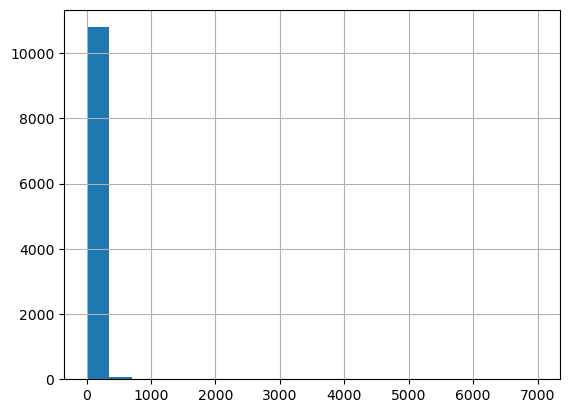

In [15]:
#corr_data['log_count_ind_annual'].hist(bins=20)
point_simple_filter['count_ind_annual'].hist(bins=20)

In [16]:
def print_hist_plots(data):

    # Assuming your table is a pandas DataFrame named 'table2'
    variables = data.columns.tolist()  # Get a list of all column names

    num_variables = len(variables)
    num_rows = (num_variables - 1) // 3 + 1  # Calculate the number of subplot rows
    fig, axs = plt.subplots(num_rows, 3, figsize=(10, 3 * num_rows))

    for i, variable in enumerate(variables):
        row = i // 3
        col = i % 3

        sns.histplot(data=data, x=variable, kde=True, ax=axs[row, col])

        axs[row, col].set_title(variable.capitalize())  # Set variable name as subplot title

    plt.tight_layout()  # Adjust subplot spacing
    plt.show()


In [17]:
def print_boxplots(data):
    # Assuming your table is a pandas DataFrame named 'table2'
    variables = data.columns.tolist()  # Get a list of all column names

    num_variables = len(variables)
    num_rows = (num_variables - 1) // 3 + 1  # Calculate the number of subplot rows
    fig, axs = plt.subplots(num_rows, 3, figsize=(10, 2 * num_rows))

    for i, variable in enumerate(variables):
        row = i // 3
        col = i % 3

        sns.boxplot(data=data, x=variable, ax=axs[row, col])

        axs[row, col].set_title(variable.capitalize())  # Set variable name as subplot title

    plt.tight_layout()  # Adjust subplot spacing
    plt.show()


In [18]:
# create function to print percentiles

def calc_percentile(data):
    # print rows and columns
    print(data.shape)
    
    # calculate percentiles
    q05, q25, q50, q75, q95 = np.percentile(data, [5, 25, 50, 75, 95])

    # calculate inter-quartile range
    iqr = q75 - q25

    # calculate min, max limits for first-order outliers
    min = q25 - 1.5*(iqr)
    min2 = q25 - 3*(iqr)
    max = q75 + 1.5*(iqr)
    max2 = q75 + 3*(iqr)

    print(min2, min, q25, q50, q75, max, max2, q95)


In [19]:
# calculate percentiles
calc_percentile(corr_data['log_point_cons_grand_tot'])


(10912,)
5.640637456246379 8.159529963543577 10.678422470840776 11.568673807396838 12.357684142372241 14.876576649669438 17.395469156966637 13.515652596053936


In [20]:
print(corr_data.shape)

(10912, 51)


In [21]:
#print_hist_plots(corr_data)

In [22]:
#print_boxplots(corr_data)

In [23]:
corr1 = corr_data.corr()
corr1.style.background_gradient(cmap='coolwarm')
corr1.round(2)

,log_point_cons_temp_ha,log_point_cons_perm_ha,log_point_cons_tot_t,log_point_cons_tot_p,log_point_cons_tot_rest,log_point_cons_grand_tot,log_count_ind_annual,log_count_ind_perm,log_obs_count_total,entr_f_area,count_area,log_Tree_high,Tree_low,Tree_medium,count_crop,count_ncrop,count_wood,count_nwood,count_feed,count_tcrop,count_pcrop,log_total_crop_area,total_ncrop_area,log_total_wood_area,total_nwood_area,total_feed_area,total_temp_area,total_perm_area,log_total_perm_area,log_total_temp_area,log_count_sps_annual,count_sps_annual,log_count_sps_perm,count_sps_perm,shannon,richness,log_Invertivore_Generalist_Generalist,log_Invertivore_Insessorial,log_Invertivore_sally_ground,log_Invertivore_sally_surface,log_Invertivore_sally_air,log_Invertivore_Aerial,log_Invertivore_bark,log_Invertivore_Generalist,log_Invertivore_Insessorial_Generalist,log_Invertivore_ground,log_Omnivore_Generalist,log_Invertivore_glean_arboreal,log_Omnivore_Insessorial,log_Invertivore_aerial,log_Omnivore_Terrestrial
log_point_cons_temp_ha,1.00,0.85,0.54,0.40,0.67,0.77,0.31,0.35,0.35,-0.09,-0.27,-0.02,-0.17,0.21,-0.27,-0.18,-0.08,-0.26,-0.28,-0.23,-0.29,-0.35,0.32,-0.11,0.09,-0.38,-0.21,-0.26,-0.35,-0.27,0.34,0.32,0.31,0.29,0.25,0.29,0.00,-0.03,-0.01,-0.07,-0.02,0.02,0.05,0.29,0.00,0.12,0.17,0.03,0.07,-0.17,-0.15
log_point_cons_perm_ha,0.85,1.00,0.38,0.41,0.70,0.76,0.18,0.37,0.37,-0.03,-0.29,0.18,-0.26,0.18,-0.31,-0.14,0.01,-0.29,-0.30,-0.27,-0.33,-0.45,0.42,0.00,-0.02,-0.50,-0.23,-0.37,-0.47,-0.31,0.27,0.26,0.48,0.43,0.45,0.43,0.00,0.05,0.01,0.02,0.03,-0.01,0.17,0.20,0.09,0.05,0.12,0.22,0.32,-0.21,-0.28
log_point_cons_tot_t,0.54,0.38,1.00,0.65,0.24,0.49,0.39,0.33,0.33,0.45,0.46,-0.13,0.03,0.06,0.51,0.15,-0.32,0.51,0.46,0.54,0.35,0.47,-0.33,-0.41,0.40,0.10,0.51,0.04,0.27,0.66,0.39,0.38,0.17,0.18,0.09,0.18,0.00,-0.05,0.02,-0.13,-0.02,0.01,-0.05,0.19,-0.06,0.10,0.12,-0.15,-0.14,-0.03,0.05
log_point_cons_tot_p,0.40,0.41,0.65,1.00,0.20,0.54,0.27,0.33,0.33,0.36,0.37,0.06,-0.06,0.04,0.40,0.17,-0.17,0.40,0.37,0.33,0.46,0.56,-0.46,-0.30,0.34,0.09,0.19,0.46,0.59,0.36,0.31,0.29,0.34,0.31,0.28,0.31,0.00,0.00,0.02,-0.06,0.03,-0.02,0.10,0.25,0.01,-0.02,0.03,0.00,0.13,-0.11,-0.04
log_point_cons_tot_rest,0.67,0.70,0.24,0.20,1.00,0.85,0.34,0.46,0.46,-0.18,-0.18,0.13,-0.19,0.14,-0.23,0.03,0.26,-0.22,-0.18,-0.21,-0.24,-0.45,0.54,0.35,-0.25,-0.09,-0.31,-0.48,-0.45,-0.32,0.39,0.37,0.49,0.45,0.41,0.45,-0.01,0.07,0.03,0.08,0.06,0.02,0.10,0.13,0.01,0.21,0.02,0.19,0.09,-0.12,-0.22
log_point_cons_grand_tot,0.77,0.76,0.49,0.54,0.85,1.00,0.44,0.55,0.55,-0.14,-0.11,0.10,-0.17,0.13,-0.11,-0.06,0.07,-0.12,-0.10,-0.10,-0.11,-0.15,0.16,0.12,-0.11,0.06,-0.09,-0.13,-0.15,-0.11,0.47,0.45,0.52,0.48,0.43,0.48,-0.01,0.04,0.04,0.06,0.05,-0.01,0.08,0.24,-0.00,0.21,0.01,0.13,0.08,-0.16,-0.16
log_count_ind_annual,0.31,0.18,0.39,0.27,0.34,0.44,1.00,0.91,0.91,-0.03,0.15,-0.21,0.31,-0.20,0.16,0.06,-0.05,0.16,0.15,0.17,0.11,0.13,-0.07,-0.04,0.09,0.25,0.12,0.01,0.08,0.17,0.58,0.57,0.31,0.31,0.01,0.31,-0.01,-0.04,-0.01,-0.08,-0.04,0.03,-0.15,-0.13,-0.16,0.22,-0.20,-0.21,-0.35,0.45,0.01
log_count_ind_perm,0.35,0.37,0.33,0.33,0.46,0.55,0.91,1.00,1.00,-0.02,0.10,0.05,0.17,-0.21,0.08,0.10,0.07,0.09,0.10,0.08,0.06,0.01,0.05,0.08,-0.01,0.11,0.02,-0.07,-0.02,0.05,0.55,0.54,0.54,0.52,0.26,0.52,-0.01,0.06,-0.02,-0.00,0.01,0.00,-0.00,-0.14,-0.07,0.16,-0.24,0.07,-0.08,0.34,-0.16
log_obs_count_total,0.35,0.37,0.33,0.33,0.46,0.55,0.91,1.00,1.00,-0.02,0.10,0.05,0.17,-0.21,0.08,0.10,0.07,0.09,0.10,0.08,0.06,0.01,0.05,0.08,-0.01,0.11,0.02,-0.07,-0.02,0.05,0.55,0.54,0.54,0.52,0.26,0.52,-0.01,0.06,-0.02,-0.00,0.01,0.00,-0.00,-0.14,-0.07,0.16,-0.24,0.07,-0.08,0.34,-0.16
entr_f_area,-0.09,-0.03,0.45,0.36,-0.18,-0.14,-0.03,-0.02,-0.02,1.00,0.73,0.11,-0.02,-0.04,0.70,0.58,0.08,0.72,0.72,0.69,0.57,0.47,-0.29,-0.04,0.15,-0.10,0.41,0.06,0.34,0.60,0.07,0.09,0.10,0.14,0.10,0.14,0.01,0.08,-0.06,-0.03,0.02,0.05,0.06,0.03,-0.01,-0.16,0.07,0.05,0.02,0.06,-0.05


In [24]:
corr_data.to_csv('../process_data/corr_data.csv')

In [25]:
# sns.pairplot(corr_data)

## Model development

This function will calculate the accuracy of the training and testing data given a model.

In [26]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"train Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

In [27]:
def get_error(y_test, prediction):
    mse = mean_squared_error(y_test, prediction)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, prediction)
    mae = mean_absolute_error(y_test, prediction)
    return  {"test mse":mse,"rmse": rmse, "mae": mae, "r2": r2 }

In [28]:
df_to_model = corr_data

In [29]:
df_to_model.columns

Index(['log_point_cons_temp_ha', 'log_point_cons_perm_ha',
       'log_point_cons_tot_t', 'log_point_cons_tot_p',
       'log_point_cons_tot_rest', 'log_point_cons_grand_tot',
       'log_count_ind_annual', 'log_count_ind_perm', 'log_obs_count_total',
       'entr_f_area', 'count_area', 'log_Tree_high', 'Tree_low', 'Tree_medium',
       'count_crop', 'count_ncrop', 'count_wood', 'count_nwood', 'count_feed',
       'count_tcrop', 'count_pcrop', 'log_total_crop_area', 'total_ncrop_area',
       'log_total_wood_area', 'total_nwood_area', 'total_feed_area',
       'total_temp_area', 'total_perm_area', 'log_total_perm_area',
       'log_total_temp_area', 'log_count_sps_annual', 'count_sps_annual',
       'log_count_sps_perm', 'count_sps_perm', 'shannon', 'richness',
       'log_Invertivore_Generalist_Generalist', 'log_Invertivore_Insessorial',
       'log_Invertivore_sally_ground', 'log_Invertivore_sally_surface',
       'log_Invertivore_sally_air', 'log_Invertivore_Aerial',
       'log_Inv

In [30]:
# Set list of features
feature_vars = ['log_count_ind_annual', 'log_count_ind_perm','log_count_sps_annual','log_obs_count_total',
       'log_count_sps_perm', 'shannon', 'richness','log_Tree_high', 'Tree_low', 'Tree_medium',
       'log_Invertivore_Generalist_Generalist', 'log_Invertivore_Insessorial', 
       'log_Invertivore_sally_ground', 'log_Invertivore_sally_surface', 
       'log_Invertivore_sally_air', 'log_Invertivore_Aerial', 'log_Invertivore_bark', 
       'log_Invertivore_Generalist', 'log_Invertivore_Insessorial_Generalist',
       'log_Invertivore_ground', 'log_Omnivore_Generalist',
       'log_Invertivore_glean_arboreal', 'log_Omnivore_Insessorial',
       'log_Invertivore_aerial', 'log_Omnivore_Terrestrial', 
       'entr_f_area','log_total_crop_area', 'total_feed_area',
       'log_total_wood_area',
       'log_total_temp_area', 'log_total_perm_area']

Let's create the X and y for our dataset:


In [31]:
X = df_to_model[feature_vars]
#X[0:5].values

In [32]:
y = df_to_model['log_point_cons_temp_ha']
y[0:5]

0    6.033026
1    5.926654
2    9.853155
3    3.970658
4    5.224185
Name: log_point_cons_temp_ha, dtype: float64

Split the data into training and testing data with a 80/20 split

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X.values, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8729, 31) (8729,)
Test set: (2183, 31) (2183,)


## Multiple Regression Model

### Linear model - temporary crops

In [34]:
from sklearn import linear_model
regr_model = linear_model.LinearRegression()
regr_model.fit (X_train, y_train)

LinearRegression()

In [35]:
X

,log_count_ind_annual,log_count_ind_perm,log_count_sps_annual,log_obs_count_total,log_count_sps_perm,shannon,richness,log_Tree_high,Tree_low,Tree_medium,log_Invertivore_Generalist_Generalist,log_Invertivore_Insessorial,log_Invertivore_sally_ground,log_Invertivore_sally_surface,log_Invertivore_sally_air,log_Invertivore_Aerial,log_Invertivore_bark,log_Invertivore_Generalist,log_Invertivore_Insessorial_Generalist,log_Invertivore_ground,log_Omnivore_Generalist,log_Invertivore_glean_arboreal,log_Omnivore_Insessorial,log_Invertivore_aerial,log_Omnivore_Terrestrial,entr_f_area,log_total_crop_area,total_feed_area,log_total_wood_area,log_total_temp_area,log_total_perm_area
0,2.564949,2.639057,1.386294,2.639057,1.609438,1.204793e+00,4,0.074108,0.615385,0.307692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.074108,0.000000,0.143101,0.570545,4.318471,4.876952,237.78,3.951820,4.526560,3.683616
1,1.098612,2.397895,1.098612,2.397895,1.609438,1.088900e+00,4,0.470004,0.300000,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.182322,0.095310,0.000000,0.470004,0.000000,0.000000,0.095310,0.786361,2.910719,297.27,1.897620,2.081938,2.429218
2,2.197225,2.772589,1.386294,2.772589,1.791759,1.564132e+00,5,0.000000,0.466667,0.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.125163,0.000000,0.382992,0.000000,0.336472,2.864587,1.258461,4.14,0.431782,1.150572,0.307485
3,1.791759,1.791759,0.693147,1.791759,0.693147,-2.220446e-16,1,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,3.676453,5.263467,269.82,1.486140,4.731010,4.391234
4,4.043051,4.060443,1.609438,4.060443,1.791759,5.293095e-01,5,0.000000,0.105263,0.894737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017392,0.000000,0.017392,0.000000,0.000000,0.675448,0.000000,2.554810,4.465333,304.56,0.000000,4.390119,1.987874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10907,0.693147,0.693147,0.693147,0.693147,0.693147,-2.220446e-16,1,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,2.117983,5.554857,300.24,1.061257,0.963174,5.548570
10908,1.098612,1.098612,0.693147,1.098612,0.693147,-2.220446e-16,1,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,2.403063,4.767629,295.56,2.284421,1.486140,4.738126
10909,0.693147,0.693147,0.693147,0.693147,0.693147,-2.220446e-16,1,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,3.311690,5.139615,280.17,2.527327,4.957938,3.379293
10910,1.098612,2.079442,0.693147,2.079442,1.386294,1.078992e+00,3,0.538997,0.000000,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.356675,0.251314,0.000000,0.251314,1.270799,3.060583,288.72,3.561046,1.798404,2.791165


In [36]:
def print_coef_table(model, df): 

    # Get the coefficients and corresponding variable names
    coefficients = model.coef_
    variable_names = list(df.columns)  # If you are using pandas DataFrame

    # Create a pandas DataFrame to store the table
    coefficients_table = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefficients})

    # Sort the table based on the absolute value of coefficients (optional)
    coefficients_table['Absolute Coefficient'] = coefficients_table['Coefficient'].abs()
    coefficients_table = coefficients_table.sort_values(by='Absolute Coefficient', ascending=False)

    # Drop the 'Absolute Coefficient' column (if you want)
    coefficients_table.drop(columns='Absolute Coefficient', inplace=True)

    # Reset the DataFrame index (optional)
    coefficients_table.reset_index(drop=True, inplace=True)

    # Display the table
    print(coefficients_table)

In [37]:
print_coef_table(regr_model, X)

                                  Variable  Coefficient
0               log_Invertivore_Generalist     8.017137
1                  log_Omnivore_Generalist     4.450613
2                log_Invertivore_sally_air     3.869579
3                   log_Invertivore_ground     3.287874
4                     log_Invertivore_bark     3.133847
5                   log_Invertivore_Aerial     2.929773
6             log_Invertivore_sally_ground     2.805082
7    log_Invertivore_Generalist_Generalist     2.536136
8                 log_Omnivore_Terrestrial     2.240539
9                            log_Tree_high    -1.940116
10          log_Invertivore_glean_arboreal     1.783592
11                    log_count_sps_annual     0.902895
12                log_Omnivore_Insessorial     0.864655
13             log_Invertivore_Insessorial    -0.713681
14                      log_count_ind_perm     0.481439
15                     log_obs_count_total     0.481439
16                             entr_f_area     0

In [38]:
y_hat = regr_model.predict(X_test)

In [39]:
x = np.asanyarray(X_test)
y = np.asanyarray(y_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

print(get_error(y_test, y_hat))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr_model.score(x, y))

Residual sum of squares: 1.25
{'test mse': 1.2451937689872934, 'rmse': 1.1158825068022589, 'mae': 0.8651110617972109, 'r2': 0.6497022154404968}
Variance score: 0.65


<Axes: xlabel='log_point_cons_temp_ha'>

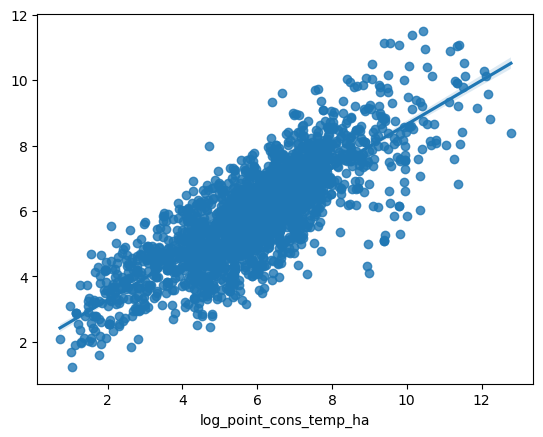

In [40]:
sns.regplot(x=y_test, y=y_hat)

### Linear model - permanent crops

In [41]:
# set the dependent variable
y = df_to_model['log_point_cons_perm_ha']

In [42]:
X_train, X_test, y_train, y_test = train_test_split( X.values, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8729, 31) (8729,)
Test set: (2183, 31) (2183,)


In [43]:
regr_model_p = linear_model.LinearRegression()
regr_model_p.fit (X_train, y_train)

LinearRegression()

In [44]:
print_coef_table(regr_model_p, X)

                                  Variable  Coefficient
0    log_Invertivore_Generalist_Generalist    16.250062
1               log_Invertivore_Generalist     7.019116
2                log_Invertivore_sally_air     6.240738
3             log_Invertivore_sally_ground     6.049564
4                     log_Invertivore_bark     5.203693
5                  log_Omnivore_Generalist     4.452005
6                   log_Invertivore_ground     3.948009
7                 log_Omnivore_Insessorial     3.396612
8           log_Invertivore_glean_arboreal     3.275570
9                   log_Invertivore_Aerial     3.181986
10                log_Omnivore_Terrestrial     2.975916
11                           log_Tree_high    -2.887008
12           log_Invertivore_sally_surface     2.820160
13  log_Invertivore_Insessorial_Generalist     1.917781
14                  log_Invertivore_aerial     1.436051
15                      log_count_sps_perm     1.156362
16             log_Invertivore_Insessorial     1

In [45]:
y_hat = regr_model_p.predict(X_test)

In [46]:
x = np.asanyarray(X_test)
y = np.asanyarray(y_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

print(get_error(y_test, y_hat))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr_model_p.score(x, y))

Residual sum of squares: 1.08
{'test mse': 1.0811502749889979, 'rmse': 1.0397837635725025, 'mae': 0.7673773929630616, 'r2': 0.6900773642053111}
Variance score: 0.69


<Axes: xlabel='log_point_cons_perm_ha'>

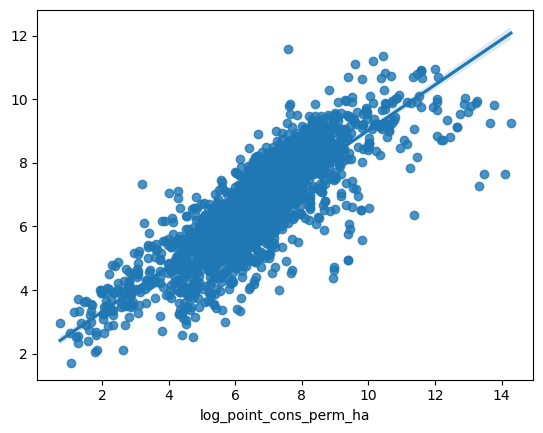

In [47]:
sns.regplot(x=y_test, y=y_hat)

## Random  Forest
### Model for total consumption

Random forests are a combination of trees such that each tree depends on a random subset of the features and data. As a result, each tree in the forest is different and usually performs better than Bagging. The most important parameters are the number of trees and the number of features to sample. First, we import <code>RandomForestClassifier</code>.


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

Increasing the number of trees improves results and does not lead to overfitting in most cases; but the improvements plateau as you add more trees. For this exxample, the number of trees in the forest (default=100):


In [49]:
n_estimators=200


<code>max_features </code>   $m$ the number of features to consider when looking for the best split. If we have M features denoted by:


In [50]:
M_features=X.shape[1]

In [51]:
max_features=round(np.sqrt(M_features))-1
max_features

5

In [52]:
# Create the RF object
model_rf = RandomForestRegressor( max_features=max_features,n_estimators=n_estimators, random_state=0)

In [53]:
# train the model
model_rf.fit(X_train,y_train)

RandomForestRegressor(max_features=5, n_estimators=200, random_state=0)

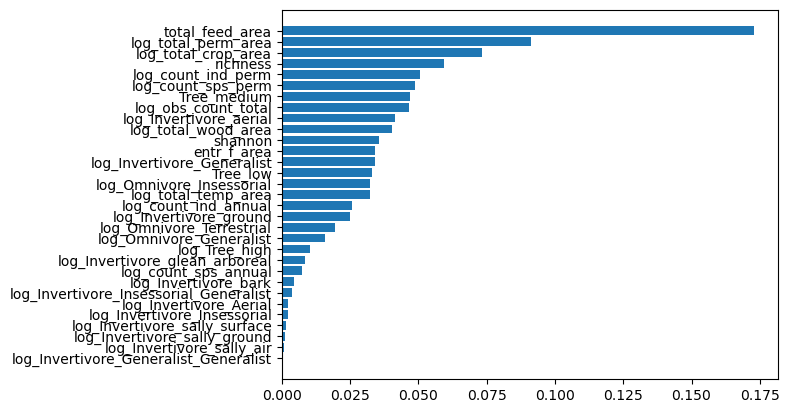

In [54]:
features = df_to_model[feature_vars].columns.to_list()

f_i = list(zip(features, model_rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [55]:
prediction = model_rf.predict(X_test)

mse = mean_squared_error(y_test, prediction)
rmse = mse**.5

print(mse)
print(rmse)

0.44704460406808466
0.6686139424721


In [56]:
print(get_error(y_test, prediction))

{'test mse': 0.44704460406808466, 'rmse': 0.6686139424721, 'mae': 0.4600063655990269, 'r2': 0.87185015328976}


<Axes: xlabel='log_point_cons_perm_ha'>

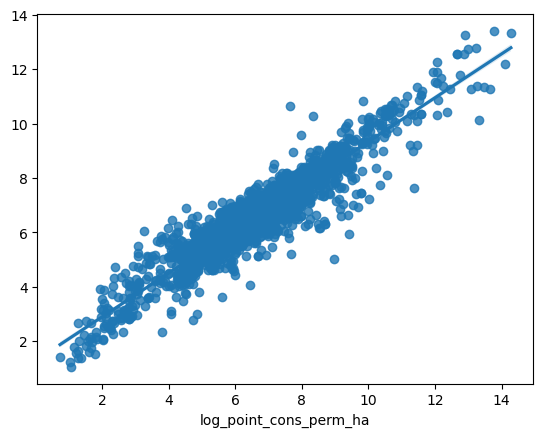

In [57]:
sns.regplot(x=y_test, y=prediction)

In [58]:
y_test

1680     5.999891
1742     5.245553
2502     7.273215
10629    4.970504
1298     7.750757
           ...   
6328     7.356319
3746     9.944271
4259     6.411130
8044     5.646630
2552     6.265994
Name: log_point_cons_perm_ha, Length: 2183, dtype: float64

In [59]:
from sklearn.model_selection import GridSearchCV
import time

In [60]:
%%time
## Define Grid 
grid1 = { 
    'n_estimators': [300,400,500,600,700],
    'max_features': ['sqrt','log2'],
    'max_depth' : [5,6,7,8,9,10],
    'random_state' : [18]
}

## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid1, cv= 5, n_jobs=6)
CV_rfr.fit(X_train, y_train)



CPU times: user 5.34 s, sys: 144 ms, total: 5.48 s
Wall time: 2min 3s


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=6,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [300, 400, 500, 600, 700],
                         'random_state': [18]})

In [61]:
CV_rfr.best_score_

0.8179389227123085

In [62]:
CV_rfr.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 700,
 'random_state': 18}

In [63]:
print(CV_rfr.best_estimator_)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=700,
                      random_state=18)


In [64]:
model_rf1 = CV_rfr.best_estimator_

In [65]:
model_rf1.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=700,
                      random_state=18)

In [66]:
prediction1 = model_rf1.predict(X_test)

/usr/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='log_point_cons_perm_ha'>

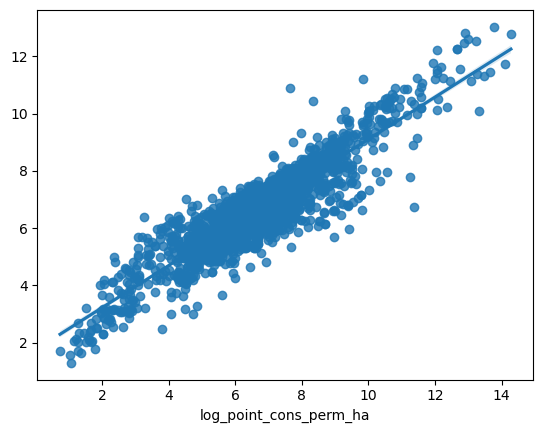

In [67]:
sns.regplot(y_test, prediction1)

In [68]:
get_error(y_test, prediction1)

{'test mse': 0.634459456991174,
 'rmse': 0.7965296334670632,
 'mae': 0.5816468484248015,
 'r2': 0.8181257945685925}

In [69]:
prediction_train = model_rf1.predict(X_train)

In [70]:
get_error(y_train, prediction_train)

{'test mse': 0.422035702201798,
 'rmse': 0.6496427496723087,
 'mae': 0.47717404227927385,
 'r2': 0.8764934319260913}

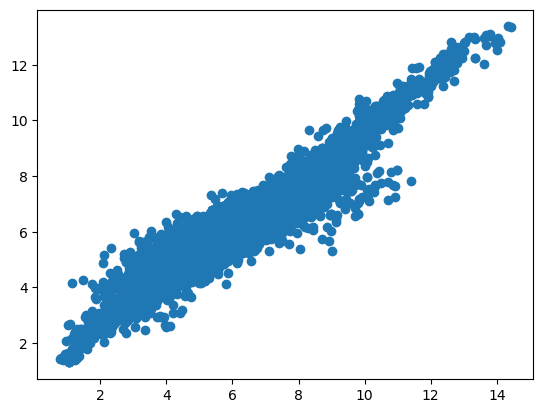

In [71]:
plt.scatter(y_train, prediction_train)

In [72]:
y_train

8886     12.604287
186       7.462543
8551      5.709983
2205      6.738745
10377     5.644406
           ...    
6017      7.026088
709       7.607912
10679     5.550905
8366      7.935094
1146     10.170019
Name: log_point_cons_perm_ha, Length: 8729, dtype: float64

In [73]:
df_zero_con = corr_data[(corr_data['log_point_cons_grand_tot'] == 0)]

In [74]:
df_zero_con.to_csv('../process_data/zero_point_consumpt.csv')

### Model for consumption in temporary crops

In [75]:
# filter data tp remove areas that have no consumption

#corr_data_filter = corr_data[(corr_data['log_point_cons_tot_t'] > 0)]
#corr_data_filter = corr_data[(corr_data['total_crop_area'] > 0) & (corr_data['total_crop_area'] < 515154)]
#corr_data_filter = corr_data

In [76]:
df_to_model = corr_data

In [77]:
df_to_model.columns

Index(['log_point_cons_temp_ha', 'log_point_cons_perm_ha',
       'log_point_cons_tot_t', 'log_point_cons_tot_p',
       'log_point_cons_tot_rest', 'log_point_cons_grand_tot',
       'log_count_ind_annual', 'log_count_ind_perm', 'log_obs_count_total',
       'entr_f_area', 'count_area', 'log_Tree_high', 'Tree_low', 'Tree_medium',
       'count_crop', 'count_ncrop', 'count_wood', 'count_nwood', 'count_feed',
       'count_tcrop', 'count_pcrop', 'log_total_crop_area', 'total_ncrop_area',
       'log_total_wood_area', 'total_nwood_area', 'total_feed_area',
       'total_temp_area', 'total_perm_area', 'log_total_perm_area',
       'log_total_temp_area', 'log_count_sps_annual', 'count_sps_annual',
       'log_count_sps_perm', 'count_sps_perm', 'shannon', 'richness',
       'log_Invertivore_Generalist_Generalist', 'log_Invertivore_Insessorial',
       'log_Invertivore_sally_ground', 'log_Invertivore_sally_surface',
       'log_Invertivore_sally_air', 'log_Invertivore_Aerial',
       'log_Inv

In [78]:
# set independent variables on temporary consumption
X = df_to_model[feature_vars].values
#X[0:5]

In [79]:
# set the dependent variable temporary consumption
y = df_to_model['log_point_cons_temp_ha']
y[0:5]

0    6.033026
1    5.926654
2    9.853155
3    3.970658
4    5.224185
Name: log_point_cons_temp_ha, dtype: float64

In [80]:
#Split the data into training and testing data with a 80/20 split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8729, 31) (8729,)
Test set: (2183, 31) (2183,)


The table with the train set has 4215 points, while the test set has 1054 points.

In [81]:
%%time
## Define Grid 
grid1 = { 
    'n_estimators': [200,300,400,500,600,700,800,900,1000],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7,8,9,10],
    'random_state' : [18]
}

## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid1, cv=5, n_jobs=8)
CV_rfr.fit(X_train, y_train)

CPU times: user 7.97 s, sys: 205 ms, total: 8.18 s
Wall time: 4min 53s


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=8,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500, 600, 700, 800,
                                          900, 1000],
                         'random_state': [18]})

In [82]:
CV_rfr.best_score_

0.7958724458786693

In [83]:
CV_rfr.best_estimator_

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=1000,
                      random_state=18)

In [84]:
model_rf_temp = CV_rfr.best_estimator_

In [85]:
#model_rf_temp = RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=1000, random_state=18)

In [86]:
model_rf_temp.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=1000,
                      random_state=18)

In [87]:
prediction_temp = model_rf_temp.predict(X_test)

#### Results

In [88]:
get_error(y_test, prediction_temp)

{'test mse': 0.7290024109019104,
 'rmse': 0.8538163800852677,
 'mae': 0.6327204598009254,
 'r2': 0.7949171158436131}

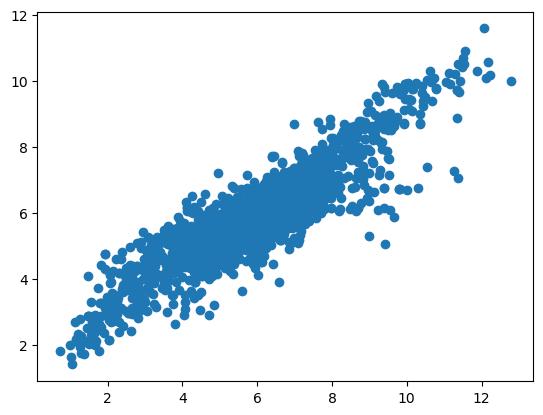

In [89]:
plt.scatter(y_test, prediction_temp)

#### Feature contribution

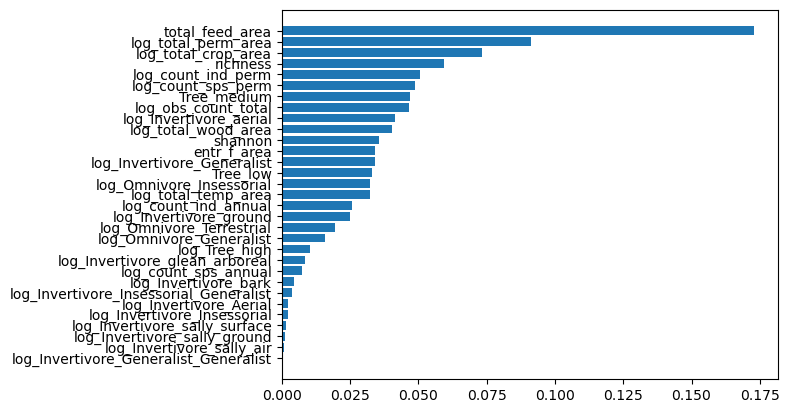

In [90]:
features = df_to_model[feature_vars].columns.to_list()

f_i = list(zip(features, model_rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [91]:
sorted_data = sorted(f_i, key=lambda x: x[1], reverse=True)

# Display the sorted data
for item in sorted_data:
    print(item)


('total_feed_area', 0.17294952683521955)
('log_total_perm_area', 0.09116652597350809)
('log_total_crop_area', 0.07311011132780383)
('richness', 0.05923592992679706)
('log_count_ind_perm', 0.05056690721336573)
('log_count_sps_perm', 0.04859709465276032)
('Tree_medium', 0.047078275570655366)
('log_obs_count_total', 0.046477437436110366)
('log_Invertivore_aerial', 0.04150654727973108)
('log_total_wood_area', 0.04028544639922909)
('shannon', 0.035590462404164164)
('entr_f_area', 0.033981452594282216)
('log_Invertivore_Generalist', 0.0339668047146871)
('Tree_low', 0.03315487184290441)
('log_Omnivore_Insessorial', 0.03236322374558764)
('log_total_temp_area', 0.032143630405666465)
('log_count_ind_annual', 0.025542461994917994)
('log_Invertivore_ground', 0.024997689300846754)
('log_Omnivore_Terrestrial', 0.019407368931188378)
('log_Omnivore_Generalist', 0.01572597566773293)
('log_Tree_high', 0.010160968181076951)
('log_Invertivore_glean_arboreal', 0.00832741310548017)
('log_count_sps_annual', 

### Model for consumption in permanent crops 

In [92]:
# filter data to remove areas that have no consumption

#corr_data_filter = corr_data[(corr_data['log_point_cons_tot_p'] > 0)]
#corr_data_filter = corr_data[(corr_data['total_crop_area'] > 0) & (corr_data['total_crop_area'] < 515154)]
#corr_data_filter = corr_data

In [93]:
df_to_model = corr_data

In [94]:
df_to_model.columns

Index(['log_point_cons_temp_ha', 'log_point_cons_perm_ha',
       'log_point_cons_tot_t', 'log_point_cons_tot_p',
       'log_point_cons_tot_rest', 'log_point_cons_grand_tot',
       'log_count_ind_annual', 'log_count_ind_perm', 'log_obs_count_total',
       'entr_f_area', 'count_area', 'log_Tree_high', 'Tree_low', 'Tree_medium',
       'count_crop', 'count_ncrop', 'count_wood', 'count_nwood', 'count_feed',
       'count_tcrop', 'count_pcrop', 'log_total_crop_area', 'total_ncrop_area',
       'log_total_wood_area', 'total_nwood_area', 'total_feed_area',
       'total_temp_area', 'total_perm_area', 'log_total_perm_area',
       'log_total_temp_area', 'log_count_sps_annual', 'count_sps_annual',
       'log_count_sps_perm', 'count_sps_perm', 'shannon', 'richness',
       'log_Invertivore_Generalist_Generalist', 'log_Invertivore_Insessorial',
       'log_Invertivore_sally_ground', 'log_Invertivore_sally_surface',
       'log_Invertivore_sally_air', 'log_Invertivore_Aerial',
       'log_Inv

In [95]:
# set independent variables on temporary consumption
X = df_to_model[feature_vars].values
#X[0:5]

In [96]:
# set the dependent variable temporary consumption
y = df_to_model['log_point_cons_perm_ha']
y[0:5]

0     6.086277
1     6.933723
2    12.433847
3     3.970658
4     5.826860
Name: log_point_cons_perm_ha, dtype: float64

In [97]:
#Split the data into training and testing data with a 80/20 split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8729, 31) (8729,)
Test set: (2183, 31) (2183,)


In [98]:
%%time
## Define Grid 
grid1 = { 
    'n_estimators': [200,300,400,500,600,700,800,900,1000],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7,8,9,10],
    'random_state' : [18]
}

## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid1, cv=5, n_jobs=8)
CV_rfr.fit(X_train, y_train)

CPU times: user 5.78 s, sys: 135 ms, total: 5.92 s
Wall time: 4min 48s


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=8,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500, 600, 700, 800,
                                          900, 1000],
                         'random_state': [18]})

In [99]:
CV_rfr.best_score_

0.8179389227123085

In [100]:
CV_rfr.best_estimator_

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=700,
                      random_state=18)

In [101]:
model_rf_perm = CV_rfr.best_estimator_

In [102]:
#model_rf_perm = RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=700, random_state=18)

In [103]:
model_rf_perm.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=700,
                      random_state=18)

In [104]:
prediction_perm = model_rf_perm.predict(X_test)

#### Results

In [105]:
get_error(y_test, prediction_perm)

{'test mse': 0.634459456991174,
 'rmse': 0.7965296334670632,
 'mae': 0.5816468484248015,
 'r2': 0.8181257945685925}

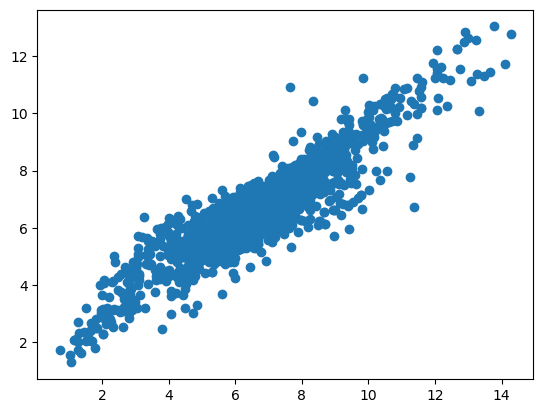

In [106]:
plt.scatter(y_test, prediction_perm)

#### Feature contribution

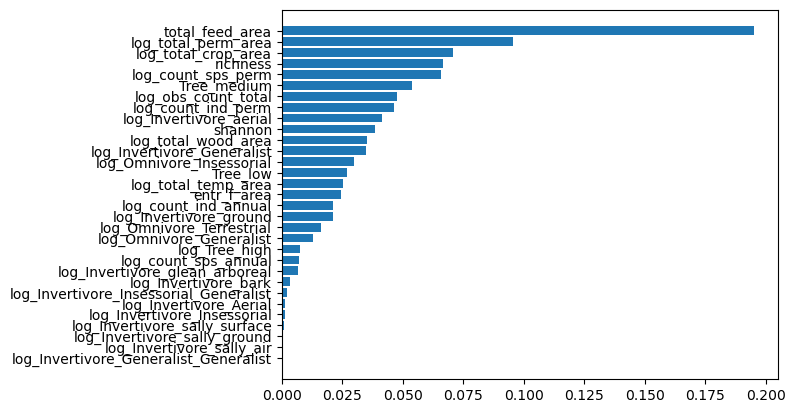

In [107]:
features = df_to_model[feature_vars].columns.to_list()

f_i = list(zip(features, model_rf_perm.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [108]:
sorted_data = sorted(f_i, key=lambda x: x[1], reverse=True)

# Display the sorted data
for item in sorted_data:
    print(item)


('total_feed_area', 0.19515176868923848)
('log_total_perm_area', 0.09530092421679572)
('log_total_crop_area', 0.07075268018809636)
('richness', 0.06661260045761741)
('log_count_sps_perm', 0.06565365539881703)
('Tree_medium', 0.053692143471213004)
('log_obs_count_total', 0.04758913493479836)
('log_count_ind_perm', 0.04647527425585878)
('log_Invertivore_aerial', 0.04152562774231157)
('shannon', 0.038651266081979885)
('log_total_wood_area', 0.03523296916400914)
('log_Invertivore_Generalist', 0.03489073084581749)
('log_Omnivore_Insessorial', 0.029819178785074472)
('Tree_low', 0.026788629177190756)
('log_total_temp_area', 0.025293800562996297)
('entr_f_area', 0.024462116433521613)
('log_count_ind_annual', 0.021303637138655372)
('log_Invertivore_ground', 0.02093911626383954)
('log_Omnivore_Terrestrial', 0.016154388836600635)
('log_Omnivore_Generalist', 0.012898716813787653)
('log_Tree_high', 0.0072960154145291075)
('log_count_sps_annual', 0.00688059197084497)
('log_Invertivore_glean_arboreal